In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [32]:
d = {v:i for i, v in enumerate(df['variety'].unique())}
df = df.replace(d)

C:\Users\marco\AppData\Local\Temp\ipykernel_24808\3705800742.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(d)


In [33]:
X = df.drop(['variety'], axis='columns')
y = df['variety']
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
X_train.shape

(120, 4)

In [35]:
y_test.value_counts()

variety
1    12
2    10
0     8
Name: count, dtype: int64

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Input


num_classes = 3
input_shape = (X_train.shape[1],)
model = Sequential([
Input(shape=input_shape),
Dense(100, activation="relu"),
Dense(100, activation="relu"),
Dense(num_classes, activation="softmax")
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,903 (42.59 KB)

 Trainable params: 10,903 (42.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(32, 1), output.shape=(32, 3)

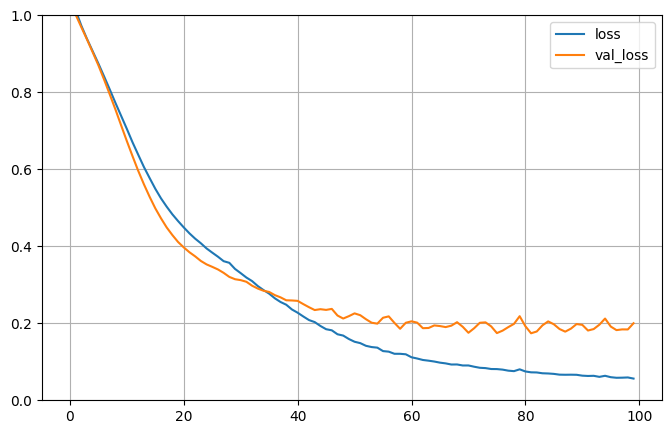

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [39]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(p) for p in y_pred]
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[ 8  0  0]
 [ 0 11  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

